In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns 

df = pd.read_csv (r"A:\Data analyst\Python projects\Diabetes Project\diabetes.csv")


In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#Task 1: Load and Inspect the Dataset
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.shape

(768, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
print(f"Colums name: {df.columns.tolist()}")

Colums name: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [18]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [23]:
#Task 2: Data Cleaning

invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in invalid_zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f'{col} : {zero_count} zeros')
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)
print(df.isnull().sum())

Glucose : 0 zeros
BloodPressure : 0 zeros
SkinThickness : 0 zeros
Insulin : 0 zeros
BMI : 0 zeros
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [27]:
# Impute missing values with median for each column
df_filled = df.copy()
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median = df_filled[col].median()
    df_filled[col].fillna(median, inplace=True)

# Check for missing values after imputation
print(df_filled.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\Shivam\AppData\Local\Temp\ipykernel_27712\3175514951.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median, inplace=True)


In [30]:
#Task 3: Exploratory Data Analysis (EDA)
#3a. Statistical Overview

print(df_filled.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

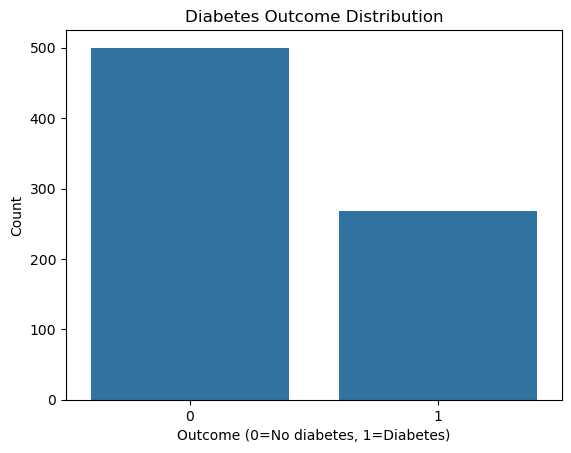

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt  

# Now create the plot
sns.countplot(x='Outcome', data=df_filled)
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Outcome (0=No diabetes, 1=Diabetes)')
plt.ylabel('Count')
plt.show()

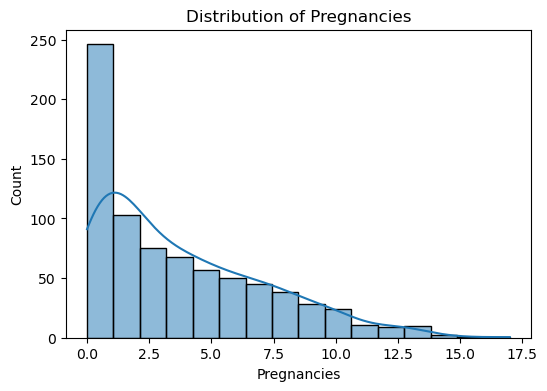

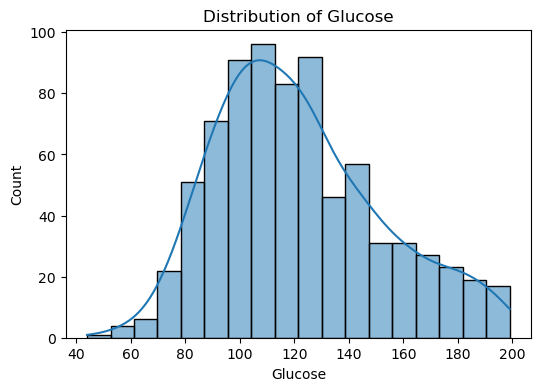

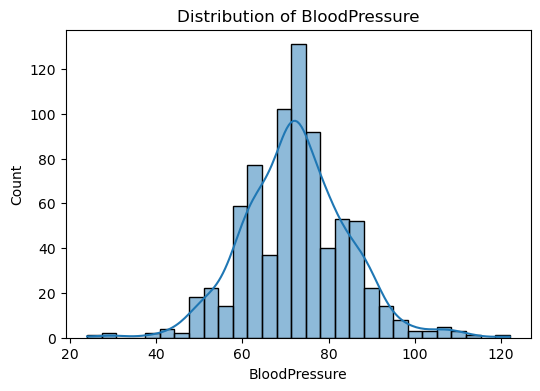

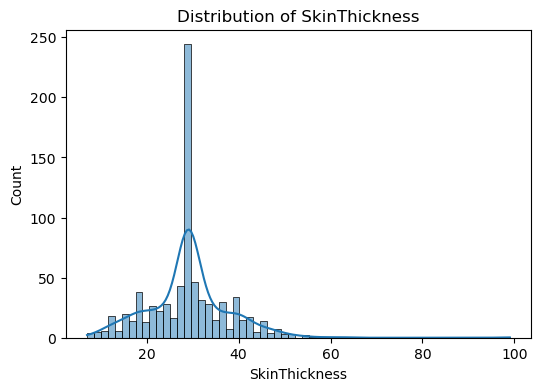

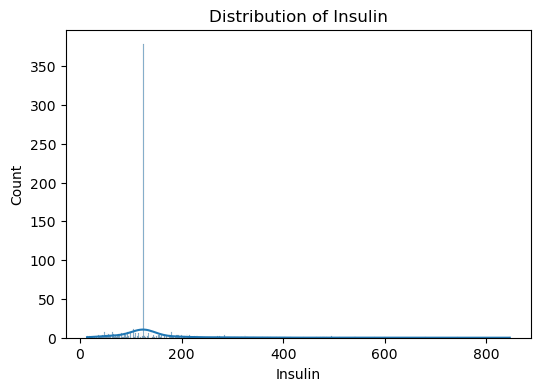

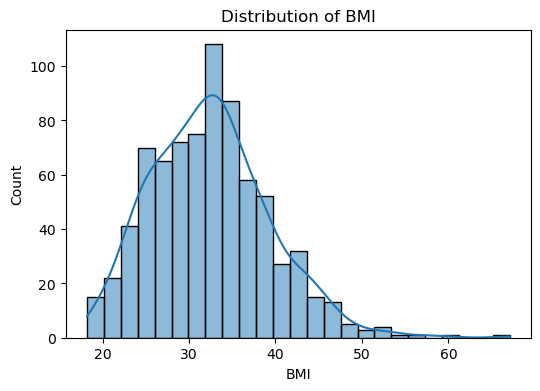

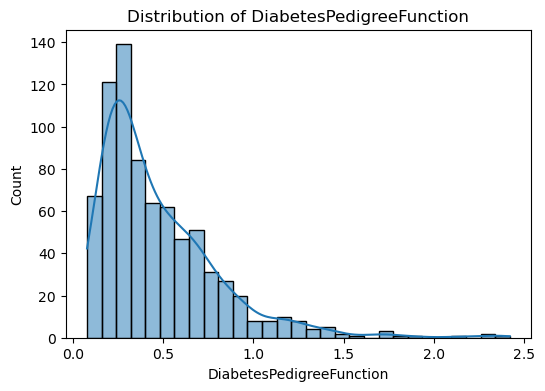

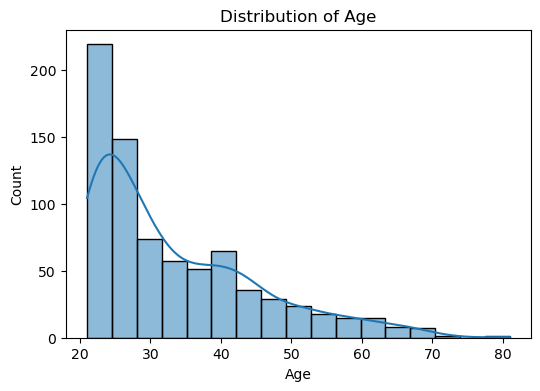

In [38]:
#3b. Feature Distributions

for col in df_filled.columns[:-1]:  # Exclude 'Outcome'
    plt.figure(figsize=(6,4))
    sns.histplot(df_filled[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

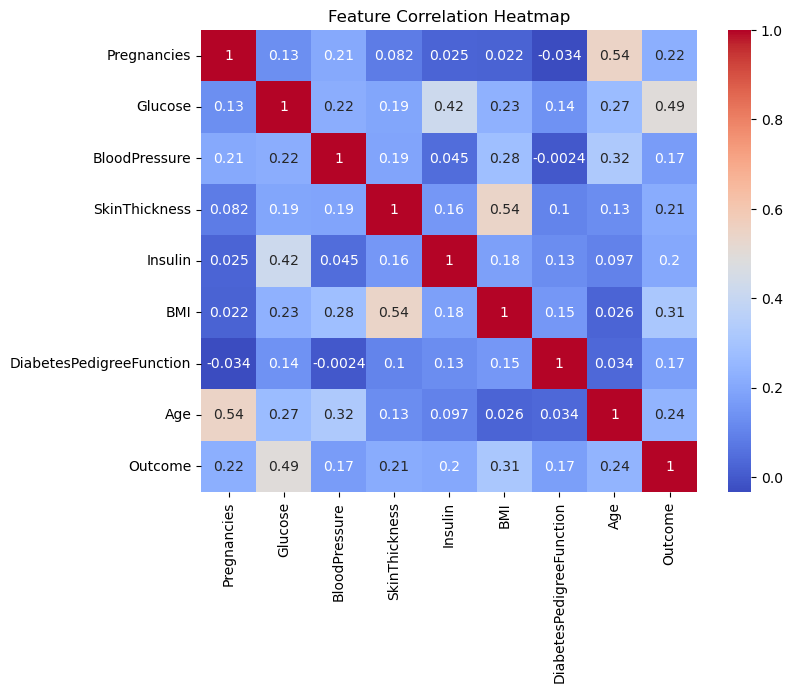

In [47]:
#3c. Correlation Analysis 
plt.figure(figsize=(8,6))
sns.heatmap(df_filled.corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [55]:
#Step 5: Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

features = df.columns[:-1]  # Select all columns except 'Outcome'
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

print(df_scaled.head())
print(df_scaled.describe())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.862287      -0.032746       0.558557       NaN  0.165097   
1    -0.844885 -1.202229      -0.517645      -0.014657       NaN -0.846404   
2     1.233880  2.009241      -0.679278            NaN       NaN -1.323254   
3    -0.844885 -1.071148      -0.517645      -0.587871 -0.518847 -0.629654   
4    -1.141852  0.501816      -2.618874       0.558557  0.104968  1.537847   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.630000e+02   7.330000e+02   5.410000e+02  3.940000e+02   
mean  -6.476301e-17  1.070936e-16  -4.871047e-16  -3.447643e-17  1.127130e-

In [69]:
for col in df_scaled.columns:
    df_scaled[col] = df_scaled[col].fillna(df_scaled[col].median())

In [73]:
print(df_scaled.isnull().sum())
print(df_scaled.isnull().any().any())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
False


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x = df_scaled.drop('Outcome',axis=1)
y = df_scaled['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
 [[82 17]
 [21 34]]


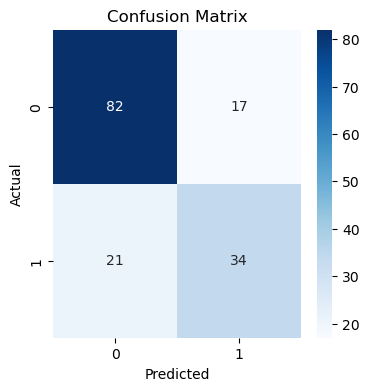

In [82]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

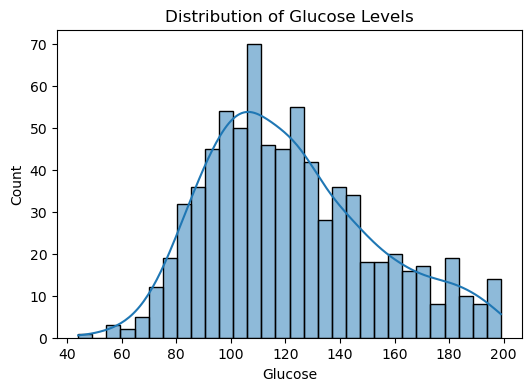

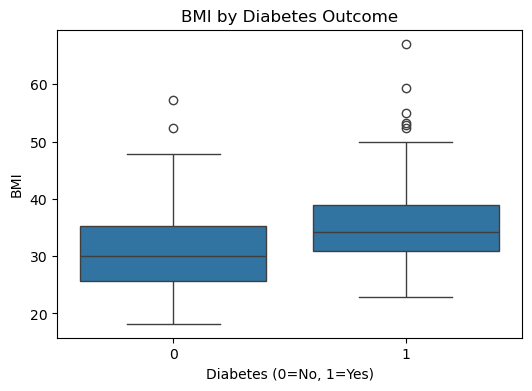

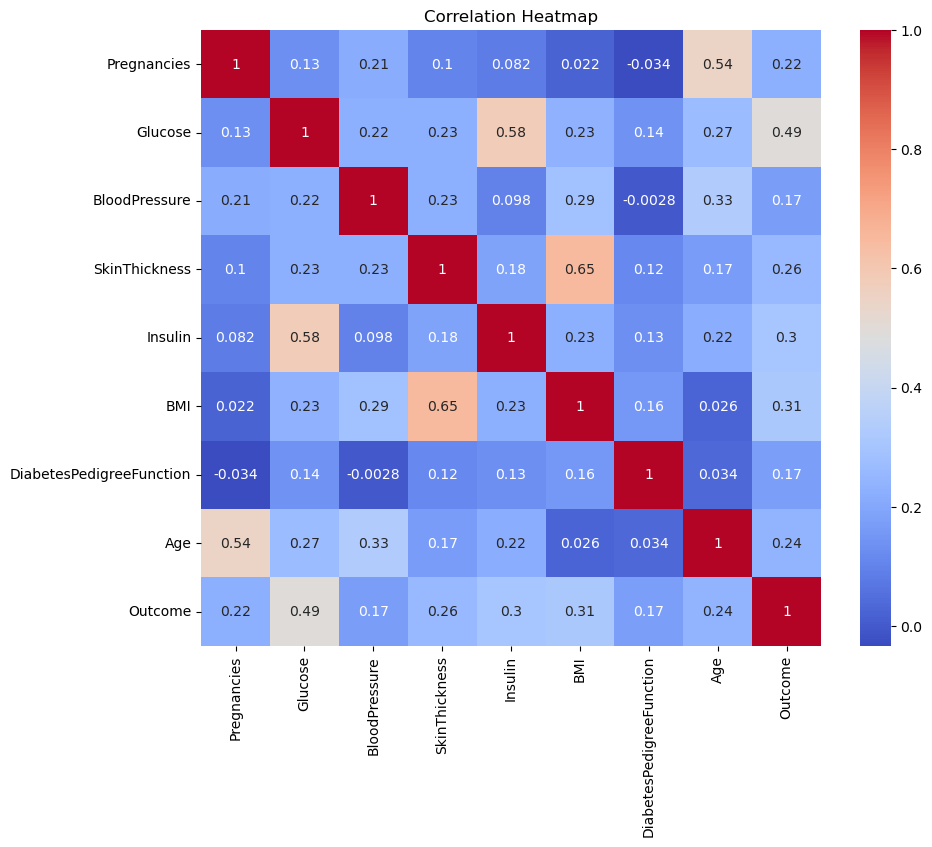

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Glucose
plt.figure(figsize=(6,4))
sns.histplot(df['Glucose'], bins=30, kde=True)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

# Boxplot of BMI by Outcome
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()